In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from data_prep import DataPrep

In [75]:
data_prep = DataPrep()

In [76]:
df = data_prep.load_raw_data(laptop=False)
#df = data_prep.prep_raw_data(df=df)

In [77]:
df['date'] = pd.to_datetime(df['date'])

In [78]:
df['pct_change'] = df.close.pct_change() * 100


In [79]:
df['gain'] = [x if x > 0 else 0 for x in df['pct_change']]
df['loss'] = [abs(x) if x < 0 else 0 for x in df['pct_change']]

In [80]:
df

,date,open,high,low,close,volume,Name,pct_change,gain,loss
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,0.000000,0.000000
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235,1.042235,0.000000
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658,0.000000,2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297,0.000000,0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934,0.000000,0.089934
...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043,0.209043,0.000000
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015,0.000000,4.339015
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442,0.000000,2.498442
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,4.179181,4.179181,0.000000


In [81]:
df['14_avg_gain'] = df.gain.rolling(14).mean()
df['14_avg_loss'] = df.loss.rolling(14).mean()

In [82]:
df['RS'] = df['14_avg_gain'] / df['14_avg_loss'] 

In [83]:
df['RSI'] = 100 - (100 / (1 + df['RS']))

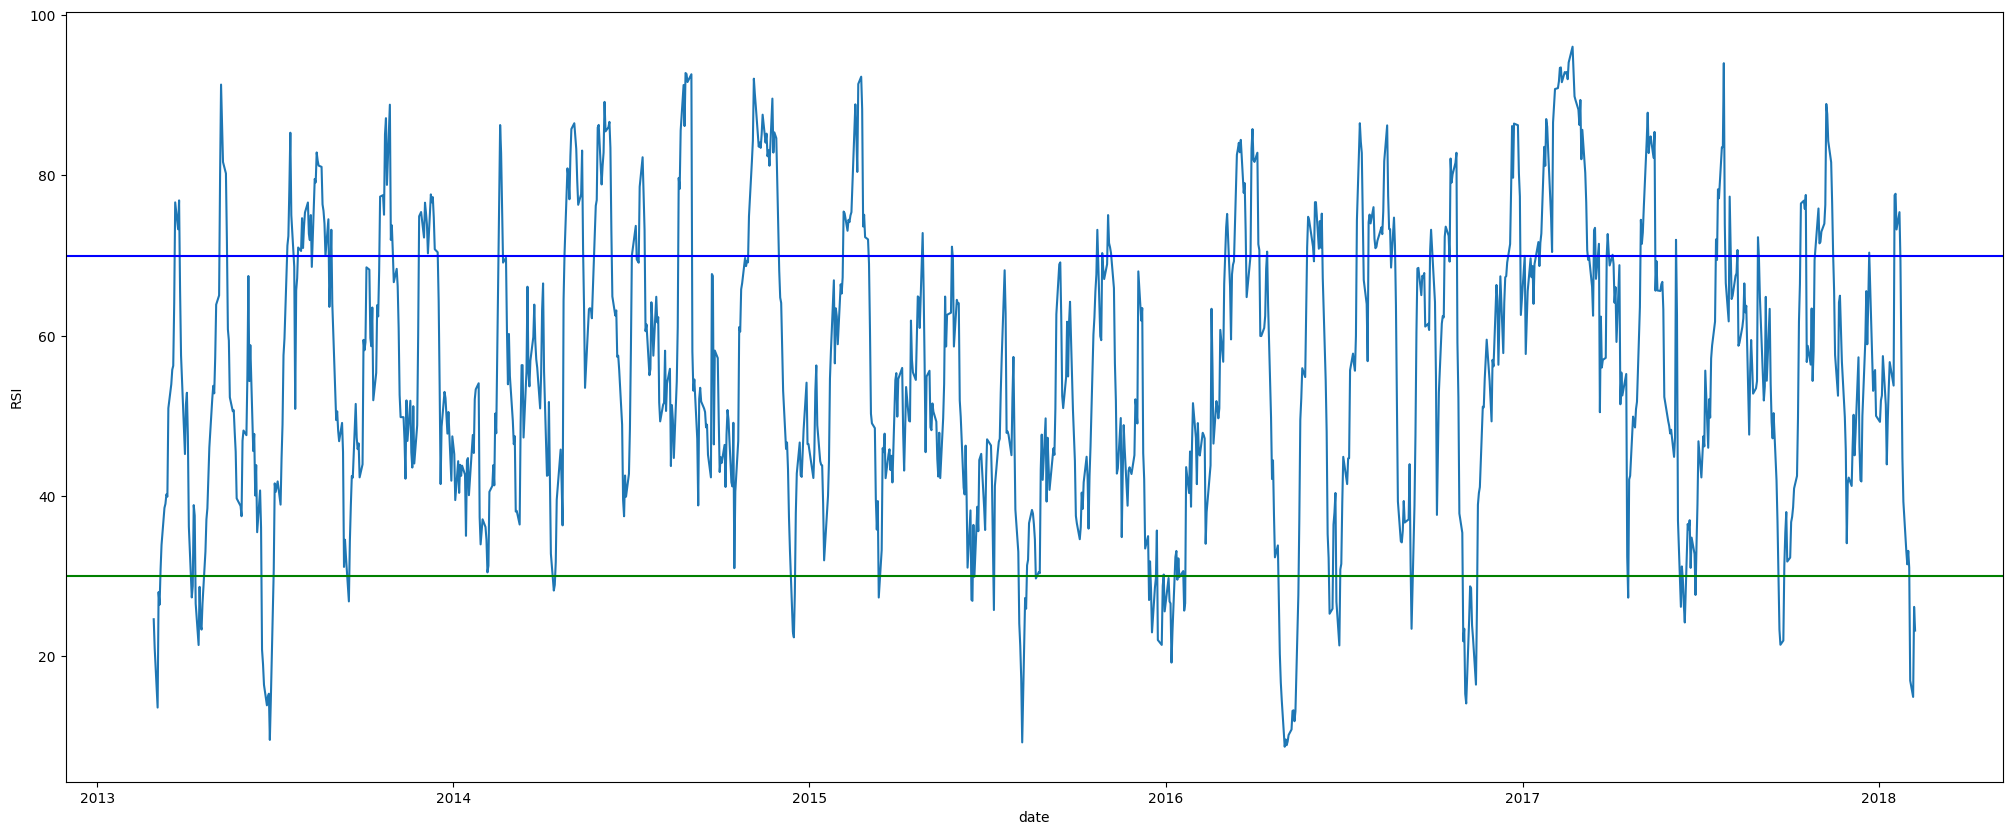

In [87]:
x = df['date']
y = df['RSI']
y1 = 70
y2 = 30


plt.figure(figsize=(25,10))
plt.plot(x, y)
plt.axhline(y = 70, color = 'b', linestyle = '-')
plt.axhline(y = 30, color = 'g', linestyle = '-')
plt.xlabel("date")
plt.ylabel("RSI")
plt.show()